In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
V = lambda l,b,g,x: l*np.cos(x)-l+2*(sigma(l,b,g)-1)*np.log(1+np.cos(x))-2*sigma(l,b,g)*np.log(3-np.cos(x)+4*np.sin(x/2))
sigma = lambda l,b,g: b*g/np.sqrt(l)
PvvV0 = lambda l,b,g: l+1
PuuV0 = lambda l,b,g: 1-l
PuV0 = lambda l,b,g: -2*sigma(l,b,g)
PvvV1 = lambda l,b,g: l+np.sqrt(2)*sigma(l,b,g)+2
PuuV1 = lambda l,b,g: 1/np.cos(np.pi/5)**2+sigma(l,b,g)*np.tan(np.pi/5)*1/np.cos(np.pi/5)-l*np.cos(2*np.pi/5)
PuV1 = lambda l,b,g: -2*np.tan(np.pi/5)-2*sigma(l,b,g)*1/np.cos(np.pi/5)+l*np.sin(2*np.pi/5)
V0 = lambda l,b,g: -2 * np.log(2)
V1 = lambda l,b,g: V(l,b,g,-2*np.pi/5)

In [4]:
apex0 = lambda l,b,g: -PuV0(l,b,g)/PuuV0(l,b,g)
Vapex0 = lambda l,b,g: V0(l,b,g)-PuV0(l,b,g)**2/(2*PuuV0(l,b,g))
apex1 = lambda l,b,g: -PuV1(l,b,g)/PuuV1(l,b,g)-2*np.pi/5
Vapex1 = lambda l,b,g: V1(l,b,g)-PuV1(l,b,g)**2/(2*PuuV1(l,b,g))
k = lambda l,b,g: (Vapex0(l,b,g)-Vapex1(l,b,g))/(apex0(l,b,g)-apex1(l,b,g))

/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_34262/1147071275.py:1: RuntimeWarning: divide by zero encountered in log
  V = lambda l,b,g,x: l*np.cos(x)-l+2*(sigma(l,b,g)-1)*np.log(1+np.cos(x))-2*sigma(l,b,g)*np.log(3-np.cos(x)+4*np.sin(x/2))


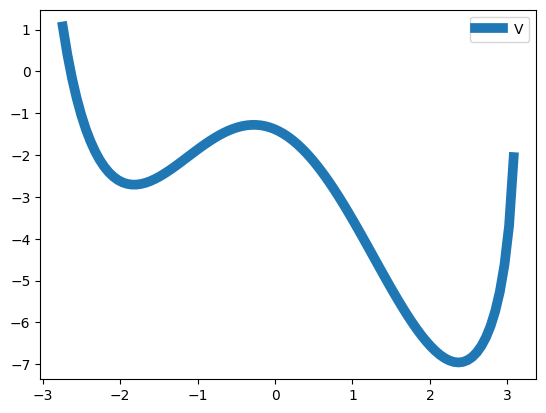

In [5]:
# test current functions
l,b,g = 4,8,0.1
V0approx = lambda x: PuuV0(l,b,g)/2*(x-apex0(l,b,g))**2 + Vapex0(l,b,g)
V1approx = lambda x: PuuV1(l,b,g)/2*(x-apex1(l,b,g))**2 + Vapex1(l,b,g)

us = np.linspace(-np.pi+0.4,np.pi,100)
#plt.plot(us,V0approx(us),label='V0approx')
#plt.plot(us,V1approx(us),label='V1approx')
plt.plot(us,V(l,b,g,us),label='V', linewidth=7)
plt.legend()
plt.savefig("plot.svg", format="svg")
plt.show()

In [6]:
def analytic_time3(l,b,g):
    term1factor = g/k(l,b,g)*np.sqrt(PvvV0(l,b,g)/PvvV1(l,b,g))*(np.exp((Vapex0(l,b,g)-Vapex1(l,b,g))/g**2)-1)
    term1inner = np.sqrt(np.pi/(2*PuuV1(l,b,g)))+np.sqrt(-np.pi/(2*PuuV0(l,b,g)))+g/k(l,b,g)
    term2factor = np.sqrt(PvvV0(l,b,g)/PvvV1(l,b,g))
    term2inner = np.pi/(2*np.sqrt(-PuuV0(l,b,g)*PuuV1(l,b,g)))-1/k(l,b,g)*(apex0(l,b,g)-apex1(l,b,g))
    print(term1factor* term1inner,term2factor*term2inner)
    return term1factor*term1inner+term2factor*term2inner

In [7]:
import scipy

def analytic_time1(lambda_val, b_val, g_val):
    def parametrize(alpha, beta):
        u = np.arcsin(g_val * alpha / np.sqrt(lambda_val)) + np.arcsin(g_val * beta / np.sqrt(lambda_val))
        v = np.arcsin(g_val * alpha / np.sqrt(lambda_val)) - np.arcsin(g_val * beta / np.sqrt(lambda_val))
        return u, v

    def analytic_time():
        def V(u, v):
            term1 = lambda_val * (np.cos(u) - np.cos(v)) - 2 * np.log(np.cos(u) + np.cos(v))
            term2 = 2 * g_val * b_val / np.sqrt(lambda_val) * np.log(np.cos(u) + np.cos(v))
            term3 = -2 * g_val * b_val / np.sqrt(lambda_val) * np.log(
                2 + 2 * np.sin((u + v) / 2) + 2 * np.sin((u - v) / 2) + np.cos(v) - np.cos(u)
            )
            return term1 + term2 + term3

        def Vuu(alpha):
            return (lambda_val - g_val**2 * b_val * alpha) / (lambda_val - g_val**2 * alpha**2) - lambda_val + 2 * g_val**2 * alpha**2

        def Vvv(alpha):
            return (lambda_val - g_val**2 * b_val * alpha) / (lambda_val - g_val**2 * alpha**2) + lambda_val

        # Solve for roots
        coeffs = [g_val**2, 0, 1-lambda_val, -b_val]
        alpha_roots = np.sort(np.real(np.roots(coeffs)))

        # Map alpha_roots to u_roots
        u_roots = [parametrize(alpha, alpha)[0] for alpha in alpha_roots]

        # Calculate V values
        Vs = V(u_roots[1], 0)
        Va = V(u_roots[0], 0)
        Vb = V(u_roots[2], 0)

        # Calculate terms
        term1 = 2 * np.pi * np.exp((Vs - Va) / g_val**2) / np.sqrt(Vuu(alpha_roots[0]) * Vvv(alpha_roots[0]))
        term2 = 2 * np.pi * np.exp((Vs - Vb) / g_val**2) / np.sqrt(Vuu(alpha_roots[2]) * Vvv(alpha_roots[2]))
        term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))
        term4 = np.exp((Va - Vb) / g_val**2)
        term5 = np.sqrt(Vuu(alpha_roots[0]) * Vvv(alpha_roots[0]) / Vuu(alpha_roots[2]) / Vvv(alpha_roots[2]))

        return (term1 + term2) * term3 / (term4 * term5 + 1)

    return analytic_time()

In [28]:
l,b,g = 2.0,39,0.01
print(analytic_time1(l,b,g))
print(analytic_time3(l,b,g))
print(Vapex0(l,b,g), Vapex1(l,b,g))
print(apex0(l,b,g), apex1(l,b,g))
print(PvvV0(l,b,g), PvvV1(l,b,g))


nan
0.2776906512280838 7.37213437086258
7.649825022090663
-1.2341943611198907 -1.2001289987730939
-0.551543289325507 -1.055583628118237
3.0 4.390000000000001


/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_34262/3793240397.py:38: RuntimeWarning: overflow encountered in exp
  term2 = 2 * np.pi * np.exp((Vs - Vb) / g_val**2) / np.sqrt(Vuu(alpha_roots[2]) * Vvv(alpha_roots[2]))
/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_34262/3793240397.py:39: RuntimeWarning: invalid value encountered in sqrt
  term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))
/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_34262/3793240397.py:40: RuntimeWarning: overflow encountered in exp
  term4 = np.exp((Va - Vb) / g_val**2)


6.876739657027108e+27 -2.6863741062436843
7.171164577962127e+26 -2.69513864419652
7.81138154901773e+25 -2.704986002434013
8.88367590968565e+24 -2.7159906450082385
1.0543521715017934e+24 -2.7282349771207914
1.3053111629696763e+23 -2.7418103795265023
1.6849646368299107e+22 -2.756818409479154
2.2669124328641357e+21 -2.7733722002461514
3.177390627504196e+20 -2.7915980984534094
4.637981683506711e+19 -2.811637587648028
7.047688518482919e+18 -2.833649558049078
1.1144652744007972e+18 -2.8578129972545914
1.833318303276121e+17 -2.884330195707968
3.1362935167965732e+16 -2.9134305853918634
5577839467113520.0 -2.945375362425453
1030994136225679.0 -2.980463086644468
198000159376297.1 -3.0190365075589836
39498522299468.586 -3.061490941576116
8182729755087.657 -3.108284627582256
1760045690153.8818 -3.15995162783809
392984831996.94025 -3.217118034716726
91071895744.25208 -3.2805225150581063
21902570229.576008 -3.3510426090587644
5466009225.045298 -3.4297287554117504
1415444154.170941 -3.517848826159432

/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_21207/3793240397.py:39: RuntimeWarning: invalid value encountered in sqrt
  term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))


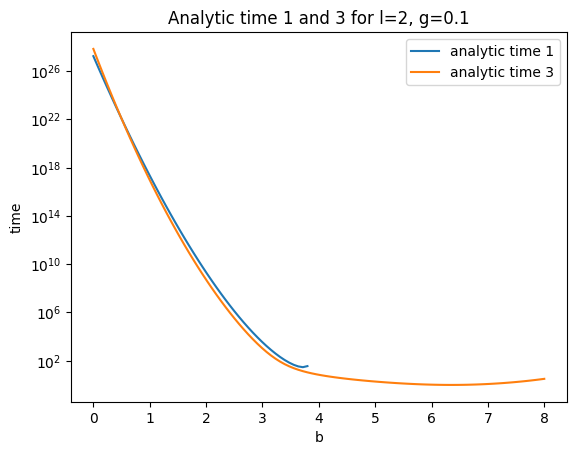

In [88]:
g = 0.1
l = 2
bs = np.linspace(0, 8, 100)

t1s = [analytic_time1(l, b, g) for b in bs]
t3s = [analytic_time3(l, b, g) for b in bs]

bs1 = [b for i,b in enumerate(bs) if not np.isnan(t1s[i])]
t1s = [t for t in t1s if not np.isnan(t)]

bs3 = [b for i,b in enumerate(bs) if not np.isnan(t3s[i])]
t3s = [t for t in t3s if not np.isnan(t)]


plt.plot(bs1, t1s, label='analytic time 1')
plt.plot(bs3, t3s, label='analytic time 3')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('b')
plt.ylabel('time')
plt.title(f'Analytic time 1 and 3 for l={l}, g={g}')
plt.show()

9.412270149709162e+16 -2.8949268412496214
5382530141327765.0 -2.905899621242468
402149338953896.94 -2.9172623916968106
38073720931994.67 -2.9290297145154125
4448797372382.13 -2.9412169023747547
627058924342.3634 -2.9538400670709217
104515977229.11978 -2.96691617164605
20245214585.182102 -2.980463086644468
4488688570.382549 -2.9944996508849338
1124001327.3511596 -3.0090457371774457
314156193.6006303 -3.024122323459983
96990861.20371166 -3.0397515698835575
32772625.053877536 -3.055956902433717
12020483.993046587 -3.0727631037439975
4751019.1697971355 -3.090196411832855
2010338.0212598462 -3.108284627582256
905377.5744219457 -3.1270572318737577
431708.802271491 -3.146545513409333
216922.63871115708 -3.1667827083710236
114373.92209634281 -3.187804153218172
63036.525239176655 -3.2096474520863056
36190.51158632236 -3.2323526604413004
21575.939179172063 -3.255962486859908
13319.198324180612 -3.2805225150581063
8491.656893059735 -3.3060814485770558
5578.082251616064 -3.332691380870004
3767.181

/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_21207/3793240397.py:39: RuntimeWarning: invalid value encountered in sqrt
  term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))


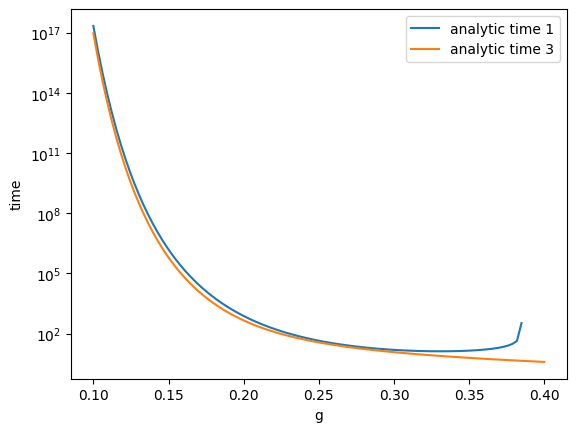

In [52]:
b = 1
l = 2
gs = np.linspace(0.1, 0.4, 100)

t1s = [analytic_time1(l, b, g) for g in gs]
t3s = [analytic_time3(l, b, g) for g in gs]

plt.plot(gs, t1s, label='analytic time 1')
plt.plot(gs, t3s, label='analytic time 3')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('g')
plt.ylabel('time')
plt.show()